# Feature scaling

#### Below are the functions for performing logistic regression using gradient descent from the previous homework

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [68]:
X, y = load_breast_cancer(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Set the random seed so that we have reproducible experiments
np.random.seed(123)

# Split into train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [69]:
X

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [70]:
def sigmoid(t):
    return 1.0 / (1 + np.exp(-t))

In [71]:
def negative_log_likelihood(X, y, w):
    nll = - ( y @ np.log(sigmoid(w @ X.T)).T + (1 - y) @ (np.log(1 - sigmoid(w @ X.T))).T)
    return nll

In [72]:
def compute_loss(X, y, w, lmbda):
    return negative_log_likelihood(X, y, w) / len(y) + lmbda * 0.5 * np.linalg.norm(w[1:])**2

In [73]:
def get_gradient(X, y, w, mini_batch_indices, lmbda):
    n_batch = mini_batch_indices.shape[0]
    nll_gradient = np.dot(X[mini_batch_indices].T,sigmoid(np.dot(X[mini_batch_indices], w)) - y[mini_batch_indices])
    ones = np.ones(w.shape)
    ones[0] = 0
    reg_gradient = lmbda * ones * w
    grad = nll_gradient / n_batch + reg_gradient  
    return grad

In [74]:
def logistic_regression(X, y, num_steps, learning_rate, mini_batch_size, lmbda, verbose):
    trace = []
    n_train = X.shape[0] 
    
    w = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        permuted_idx = np.random.permutation(n_train)
        
        for idx in range(0, n_train, mini_batch_size):
            mini_batch_indices = permuted_idx[idx:idx+mini_batch_size]
            gradient = get_gradient(X, y, w, mini_batch_indices, lmbda)
            w = w - learning_rate * gradient
        
        if step % 50 == 0:
            loss = compute_loss(X, y, w, lmbda)
            trace.append(loss)
            if verbose:
                print('Step {0}, loss = {1:.4f}'.format(step, loss))
    return w, trace

In [75]:
def predict(X, w):
    return (sigmoid(np.dot(X, w)) > 0.5).astype(np.int)

## running and observing results

In [76]:
# Change this to True if you want to see loss values over iterations.
verbose = False

In [77]:
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=1e-5, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.1,
                                         verbose=verbose)

In [78]:
n_train = X_train.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-5,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)

In [79]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.9240, f1_score: 0.9384
Mini-batch: accuracy: 0.9415, f1_score: 0.9533


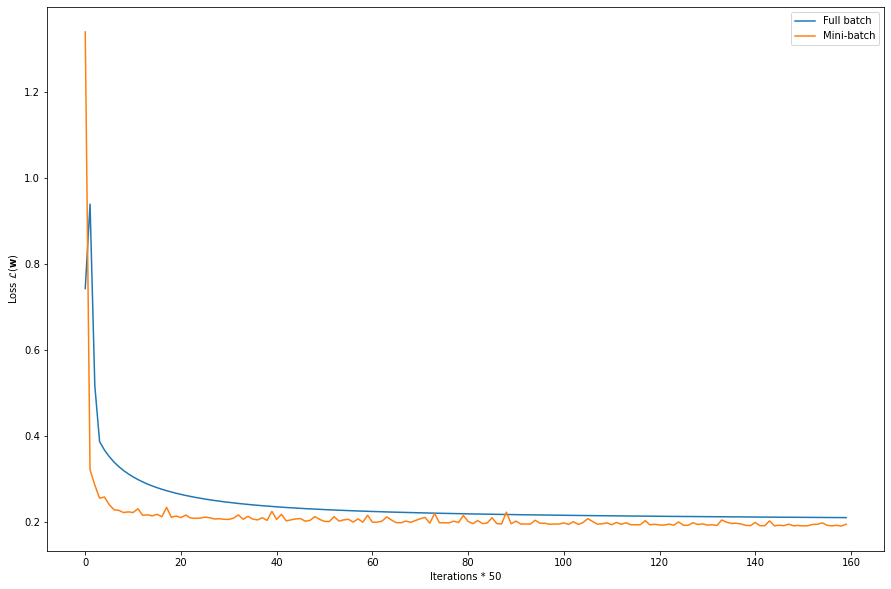

In [80]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task 1: Apply minmax normalization on X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [81]:
X_train = pd.DataFrame(X_train[:,1:])

In [82]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler().fit(X_train)
# X_train_new = pd.DataFrame(columns = X_train.columns, data = minmax.transform(X_train))
# X_test_new = pd.DataFrame(columns = X_test.columns, data = minmax.transform(X_test))

In [83]:
X_train_new = (X_train - X_train.min())/(X_train.max()-X_train.min())
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.193573,0.468858,0.191394,0.100017,0.360928,0.237065,0.260544,0.204026,0.165657,0.331508,...,0.138952,0.665857,0.141274,0.062177,0.330012,0.232979,0.289936,0.331718,0.107826,0.273652
1,0.308125,0.100000,0.288819,0.176907,0.355241,0.111979,0.024906,0.095278,0.268687,0.192923,...,0.218990,0.119838,0.201718,0.108550,0.237600,0.071460,0.029808,0.199381,0.247979,0.109359
2,0.481474,0.404498,0.458195,0.325195,0.402907,0.198965,0.212301,0.324404,0.407576,0.122999,...,0.471530,0.454521,0.437243,0.300814,0.517724,0.238568,0.310623,0.681787,0.325448,0.175144
3,0.312180,0.236332,0.291553,0.179482,0.317956,0.109313,0.033271,0.056710,0.279798,0.188290,...,0.248958,0.299325,0.232881,0.124628,0.228215,0.102534,0.064816,0.175395,0.157500,0.142252
4,0.581327,0.561246,0.563247,0.415172,0.445698,0.372531,0.450094,0.480318,0.425253,0.257793,...,0.549741,0.631849,0.535357,0.372271,0.679446,0.380973,0.459585,0.643299,0.333728,0.357409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.198135,0.085121,0.190099,0.103922,0.335831,0.152869,0.098313,0.166501,0.282828,0.334035,...,0.160149,0.126046,0.144731,0.071680,0.426034,0.158535,0.153514,0.290344,0.237926,0.275687
394,0.262000,0.101730,0.251115,0.143482,0.548614,0.193917,0.089035,0.168986,0.243939,0.311710,...,0.195965,0.231849,0.194754,0.093266,0.509783,0.201010,0.143051,0.396907,0.161049,0.258477
395,0.220944,0.426990,0.221830,0.119025,0.150943,0.253371,0.186106,0.148012,0.072222,0.350253,...,0.142241,0.437787,0.167099,0.065701,0.028157,0.310888,0.232588,0.375258,0.123398,0.325958
396,0.646206,0.394464,0.617931,0.481679,0.350907,0.271558,0.229592,0.386928,0.281818,0.118155,...,0.571303,0.374629,0.542474,0.386165,0.350949,0.217218,0.215815,0.606529,0.205795,0.104357


In [84]:
X_test = pd.DataFrame(X_test[:,1:])

In [85]:
X_test_new = (X_test - X_train.min())/(X_train.max()-X_train.min())
X_test_new

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.180394,0.152249,0.168801,0.094225,0.274713,0.056695,0.002281,0.014617,0.360101,0.228517,...,0.149185,0.258300,0.140257,0.066768,0.234712,0.061109,0.004407,0.057285,0.246403,0.162258
1,0.103959,0.183045,0.097712,0.051274,0.340706,0.063939,0.025843,0.069930,0.515657,0.277169,...,0.075725,0.226451,0.069137,0.032652,0.452025,0.056370,0.032292,0.177285,0.251528,0.226433
2,0.499214,0.309343,0.483379,0.335193,0.334477,0.292568,0.242737,0.372167,0.225253,0.104254,...,0.429135,0.360324,0.432159,0.251935,0.389936,0.333915,0.280192,0.666323,0.268677,0.200322
3,0.269603,0.409689,0.245287,0.152750,0.089194,-0.022327,0.003737,0.009205,0.169192,0.050126,...,0.194503,0.446154,0.171267,0.095574,-0.020504,-0.010004,0.006371,0.031818,0.143899,0.028739
4,0.545846,0.281661,0.526551,0.388140,0.416268,0.247099,0.312793,0.437127,0.541414,0.216091,...,0.520868,0.409987,0.496721,0.342249,0.402209,0.185138,0.252157,0.564261,0.419870,0.260682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.035988,0.105536,-0.029717,-0.011542,0.581114,0.154218,0.000000,0.000000,0.439394,0.594356,...,-0.027337,0.190283,-0.020741,-0.009528,0.536496,0.085991,0.000000,0.000000,0.269466,0.328756
167,0.434335,0.397924,0.428695,0.281644,0.576600,0.319222,0.421509,0.396670,0.408586,0.323505,...,0.330824,0.343320,0.301001,0.186483,0.422424,0.188156,0.267093,0.359794,0.230830,0.207613
168,0.576765,0.499308,0.578357,0.400584,0.344678,0.603638,0.493674,0.495080,0.631313,0.283698,...,0.563263,0.558165,0.624828,0.354158,0.293192,0.783709,0.578435,0.856701,0.612064,0.413360
169,0.633028,0.316955,0.617931,0.463228,0.547711,0.383819,0.499766,0.625746,0.335354,0.222620,...,0.487976,0.339541,0.465203,0.311483,0.594975,0.280485,0.423962,0.746735,0.289178,0.217955


## Task2: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results

In [86]:
X_train_new = np.hstack([np.ones([X_train_new.shape[0], 1]), X_train_new])
X_test_new = np.hstack([np.ones([X_test_new.shape[0], 1]), X_test_new])

In [87]:
verbose = False

In [88]:
n_train = X_train_new.shape[0]
w_full, trace_full = logistic_regression(X_train_new, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=4, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.00001,
                                         verbose=verbose)

In [89]:
n_train = X_train_new.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train_new, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=4,
                                                   mini_batch_size=50, 
                                                   lmbda=0.00001,
                                                   verbose=verbose)

In [90]:
y_pred_full = predict(X_test_new, w_full)
y_pred_minibatch = predict(X_test_new, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.9883, f1_score: 0.9904
Mini-batch: accuracy: 0.9883, f1_score: 0.9904


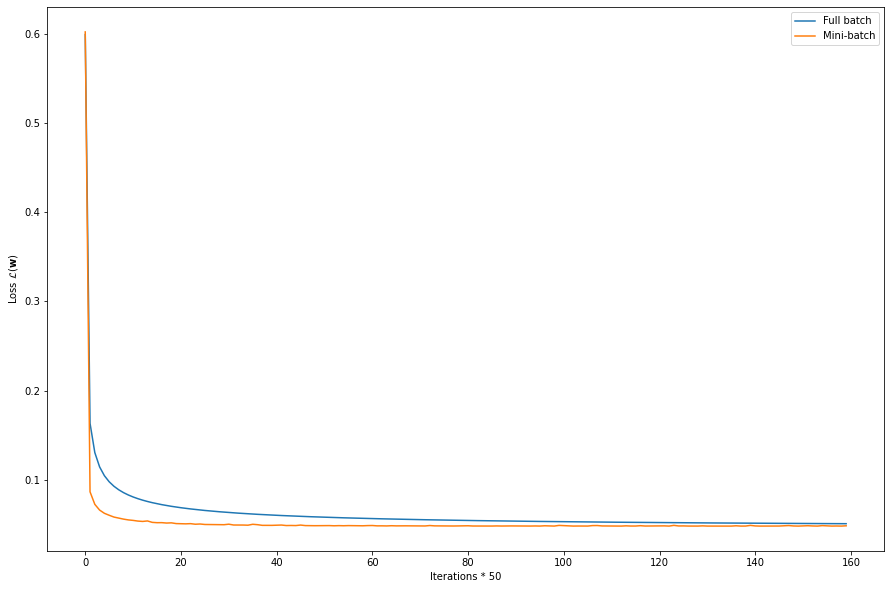

In [91]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task 3: Apply z-score normalization (standard scaling) on original X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [92]:
# from sklearn.preprocessing import StandardScaler
# norm = StandardScaler().fit(X_train)
# X_train_z  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
# X_test_z = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [93]:
X_train_z = (X_train - X_train.mean())/X_train.std()
X_train_z

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.753552,1.015313,-0.730368,-0.731734,-0.244320,-0.046146,0.275766,-0.209349,-1.461808,0.392647,...,-0.785571,1.833294,-0.747097,-0.714994,-0.048235,0.013308,0.464357,-0.272213,-1.222583,0.246065
1,-0.107183,-1.375819,-0.167147,-0.212036,-0.289871,-0.805676,-0.981050,-0.779734,-0.757755,-0.497530,...,-0.329984,-1.398112,-0.390907,-0.384138,-0.623511,-0.967318,-1.125874,-0.870434,-0.081890,-0.898621
2,0.870952,0.598099,0.812042,0.790241,0.091891,-0.277489,0.018454,0.422036,0.191336,-0.946677,...,1.107506,0.582581,0.997006,0.987612,1.120295,0.047240,0.590821,1.310254,0.548619,-0.440274
3,-0.084302,-0.492042,-0.151340,-0.194635,-0.588484,-0.821860,-0.936436,-0.982028,-0.681828,-0.527293,...,-0.159399,-0.335886,-0.207270,-0.269427,-0.681938,-0.778658,-0.911861,-0.978862,-0.818287,-0.669448
4,1.434381,1.614218,1.419356,1.398393,0.434609,0.776409,1.286767,1.239813,0.312129,-0.080852,...,1.552692,1.632029,1.575178,1.497437,2.127028,0.911820,1.501464,1.136271,0.616002,0.829631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.727812,-1.472272,-0.737855,-0.705343,-0.445323,-0.557386,-0.589521,-0.406169,-0.661120,0.408881,...,-0.664914,-1.361374,-0.726726,-0.647194,0.549513,-0.438662,-0.369626,-0.459244,-0.163712,0.260241
394,-0.367447,-1.364604,-0.385114,-0.437954,1.258867,-0.308145,-0.639009,-0.393134,-0.926866,0.265478,...,-0.461044,-0.735219,-0.431948,-0.493184,1.070857,-0.180781,-0.433590,0.022471,-0.789409,0.140338
395,-0.599110,0.743899,-0.554413,-0.603260,-1.926097,0.052865,-0.121261,-0.503144,-2.100287,0.513050,...,-0.766849,0.483547,-0.594915,-0.689857,-1.927321,0.486316,0.113772,-0.075395,-1.095839,0.610498
396,1.800466,0.533049,1.735491,1.847909,-0.324577,0.163301,0.110681,0.749981,-0.668023,-0.977792,...,1.675430,0.109771,1.617118,1.596570,0.082101,-0.082379,0.011233,0.970055,-0.425221,-0.933470


In [94]:
X_test_z = (X_test - X_train.mean())/X_train.std()
X_test_z

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.827914,-1.037113,-0.860982,-0.770886,-0.934817,-1.141362,-1.101724,-1.202804,-0.133081,-0.268898,...,-0.727323,-0.578680,-0.753089,-0.682245,-0.641489,-1.030160,-1.281157,-1.512772,-0.094725,-0.530054
1,-1.259208,-0.837478,-1.271959,-1.061186,-0.406280,-1.097378,-0.976051,-0.912685,0.929901,0.043611,...,-1.145464,-0.767166,-1.172189,-0.925651,0.711309,-1.058934,-1.110688,-0.970318,-0.053012,-0.082929
2,0.971054,-0.018751,0.957631,0.857813,-0.456169,0.290873,0.180789,0.672557,-1.054562,-1.067081,...,0.866191,0.025112,0.967049,0.638877,0.324796,0.626115,0.404787,1.240350,0.086566,-0.264850
3,-0.324546,0.631745,-0.418808,-0.375312,-2.420652,-1.621185,-1.093960,-1.231193,-1.437649,-1.414764,...,-0.469365,0.533064,-0.570350,-0.476721,-2.230240,-1.461907,-1.269150,-1.627895,-0.928987,-1.460333
4,1.234178,-0.198198,1.207212,1.215686,0.198900,0.014784,0.554447,1.013275,1.105914,-0.348716,...,1.388347,0.319021,1.347504,1.283240,0.401199,-0.277147,0.233400,0.778985,1.317103,0.155695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-2.048866,-1.339930,-2.008638,-1.485762,1.519160,-0.549199,-1.113892,-1.279472,0.408764,2.081006,...,-1.732110,-0.981208,-1.701830,-1.226590,1.237148,-0.879096,-1.308100,-1.771726,0.092984,0.629990
167,0.604968,0.555480,0.641495,0.495880,1.483008,0.452718,1.134305,0.801076,0.198238,0.341238,...,0.306589,-0.075520,0.194155,0.171890,0.527041,-0.258824,0.324709,-0.145298,-0.221469,-0.214054
168,1.408640,1.212705,1.506709,1.299789,-0.374466,2.179702,1.519210,1.317237,1.720235,0.085549,...,1.629663,1.195957,2.102423,1.368211,-0.277447,3.356939,2.228025,2.100943,2.881343,1.219462
169,1.726105,0.030597,1.735491,1.723205,1.251637,0.844955,1.551702,2.002585,-0.302192,-0.306778,...,1.201120,-0.097883,1.161770,1.063731,1.601190,0.301728,1.283691,1.603850,0.253419,-0.141994


## Task4: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results
### try to get better results than the original ones

In [95]:
X_train_z = np.hstack([np.ones([X_train_z.shape[0], 1]), X_train_z])
X_test_z = np.hstack([np.ones([X_test_z.shape[0], 1]), X_test_z])

In [96]:
verbose = False

In [97]:
n_train = X_train_z.shape[0]
w_full, trace_full = logistic_regression(X_train_z, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=0.1, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.02,
                                         verbose=verbose)

In [98]:
n_train = X_train_z.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train_z, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=0.1,
                                                   mini_batch_size=50, 
                                                   lmbda=0.02,
                                                   verbose=verbose)

In [99]:
y_pred_full = predict(X_test_z, w_full)
y_pred_minibatch = predict(X_test_z, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.9883, f1_score: 0.9904
Mini-batch: accuracy: 0.9883, f1_score: 0.9904


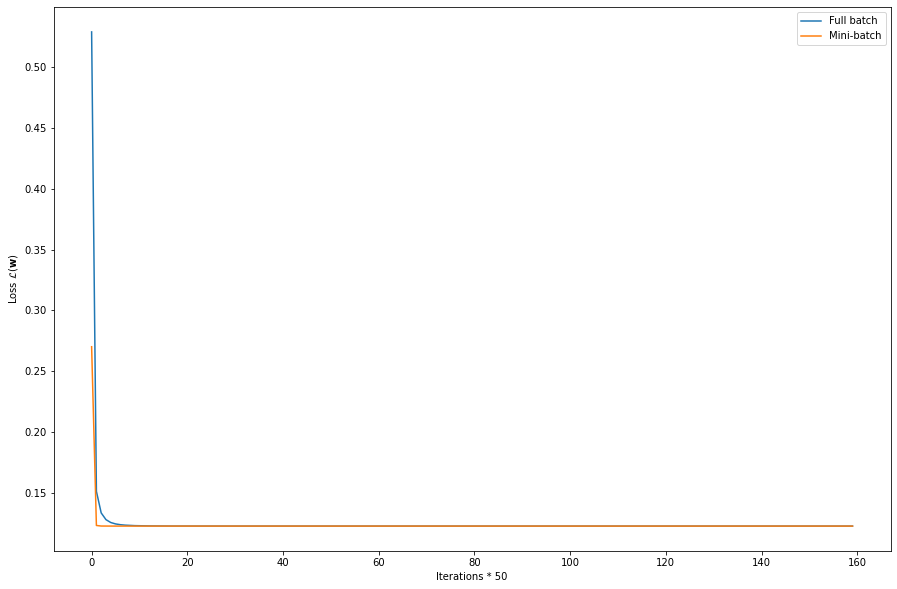

In [100]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task5: Caluclate the confustion matrix values (TP,FN,FP,TN)
#### Note: you should use y_test and the predictions of y

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_full)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)

True positive =  66
False positive =  2
False negative =  0
True negative =  103


## Task6: Caluclate the f1 score using the confusion matrix values

In [102]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.9850746268656716


In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_full)

0.9903846153846153

---

## Optional Task: plot the ROC(Receiver Operating Characteristic) curve
#### note: you may use sklearn and use the values of the sigmoid function before turning them into predictions of 0 or 1

In [107]:
from sklearn.metrics import roc_curve, auc
y_score = sigmoid(np.dot(X_test_z, w_full))
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

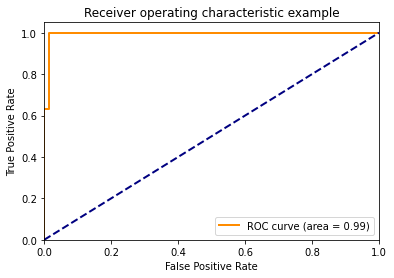

In [106]:
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()